curses is not supported on this machine (please install/reinstall curses for an optimal experience)
loaded network
34  19  1  27  0  16  

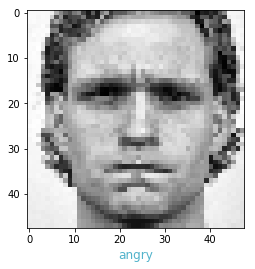

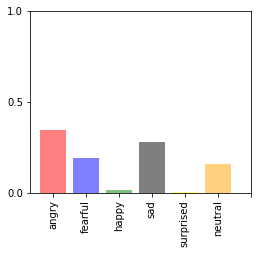

In [1]:
import pandas as pd
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import tensorflow
import tflearn
import numpy as np
import six
from tflearn import *

EMOTIONS = ['angry','fearful', 'happy', 'sad', 'surprised', 'neutral']
def network():
    network = input_data(shape=[None, 48, 48, 1])

    network = conv_2d(network, 32, 3, activation='relu')
    network = conv_2d(network, 32, 5, activation='relu')
    network = max_pool_2d(network, 2, strides=2)
    network = dropout(network, 0.3)
    network = local_response_normalization(network)
    network = conv_2d(network, 64, 3, activation='relu')
    network = conv_2d(network, 64, 5, activation='relu')
    network = max_pool_2d(network, 2, strides=2)
    network = dropout(network, 0.3)
    network = local_response_normalization(network)
    network = conv_2d(network, 128, 3, activation='relu')
    network = conv_2d(network, 128, 5, activation='relu') 
    network = max_pool_2d(network, 2, strides=2)
    network = dropout(network, 0.3)
    network = local_response_normalization(network)
    network = fully_connected(network, 1024, activation='relu')
    network = dropout(network, 0.7)  # need to change if needed 0.7 -> 0.5
    network = fully_connected(network, 1024, activation='relu')
    network = dropout(network, 0.7)  # need to change if needed 0.7 -> 0.5
    network = fully_connected(network, len(EMOTIONS), activation='softmax')

    network = regression(network,
                         optimizer='adam',
                         loss='categorical_crossentropy',
                         learning_rate=0.001)  # need to check with different learning rate

    model = tflearn.DNN(network, tensorboard_verbose=3)
    return model

def getrawnetwork():
    return network()

def getsavednetwork(savepath='../../SavedModels/model_2b0.tfl'):
    model = getrawnetwork()
    model.load(savepath)
    return model
    
    
model = getsavednetwork()
print("loaded network")


images_train = np.load("../../RafD/RaFD_images_train.npy")
pixels = images_train[105][0]/255

image48 = pixels.reshape(1, 48, 48, 1)

result = model.predict(image48)
EMOTIONS = ['angry','fearful', 'happy', 'sad', 'surprised', 'neutral']
plt.xlabel(EMOTIONS[result[0].index(max(result[0]))], color='#53b3cb',fontsize=12)
plt.imshow(image48.reshape(48,48), cmap = cm.gray)

for i in result[0]:
    print(int(i*100),end="  ")

fig = plt.figure(figsize=(20,20))
#input_img = X[i:(i+1),:,:,:]
ax = fig.add_subplot(6,6,1)
y_prob = np.array(result[0])
ax.bar(np.arange(0,6), y_prob, color=['red','blue','green','black','yellow','orange'],alpha=0.5)
ax.set_xticks(np.arange(0.0,6.5,1))
ax.set_xticklabels(EMOTIONS, rotation=90, fontsize=10)
ax.set_yticks(np.arange(0.0,1.1,0.5))
plt.tight_layout() 
plt.show()